<a href="https://colab.research.google.com/github/sweathabalaji/Mobius/blob/main/mobius.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Surface Area ≈ 2.5425
Edge Length ≈ 12.6917


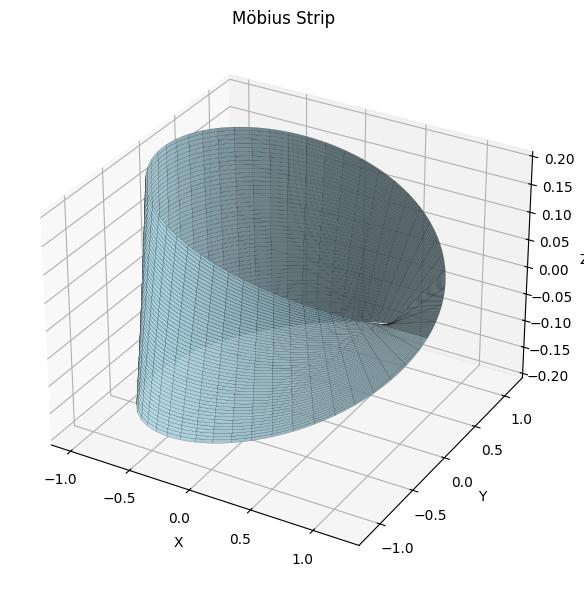

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

class MobiusStrip:
    def __init__(self, R=1.0, w=0.2, n=100):
        """
        Initialize the Möbius strip with given parameters.

        Parameters:
        - R: radius (distance from center to strip)
        - w: width of the strip
        - n: resolution (number of points in mesh per dimension)
        """
        self.R = R
        self.w = w
        self.n = n
        self.u, self.v = np.meshgrid(
            np.linspace(0, 2 * np.pi, n),
            np.linspace(-w / 2, w / 2, n)
        )
        self.x, self.y, self.z = self._generate_mesh()

    def _generate_mesh(self):
        """Generate 3D coordinates of the Möbius strip surface."""
        u, v = self.u, self.v
        x = (self.R + v * np.cos(u / 2)) * np.cos(u)
        y = (self.R + v * np.cos(u / 2)) * np.sin(u)
        z = v * np.sin(u / 2)
        return x, y, z

    def surface_area(self):
        """
        Approximate the surface area using numerical integration.

        Surface area ≈ ∑∑ ||∂r/∂u × ∂r/∂v|| Δu Δv
        """
        du = 2 * np.pi / (self.n - 1)
        dv = self.w / (self.n - 1)

        # Partial derivatives
        dx_du = np.gradient(self.x, du, axis=1)
        dx_dv = np.gradient(self.x, dv, axis=0)

        dy_du = np.gradient(self.y, du, axis=1)
        dy_dv = np.gradient(self.y, dv, axis=0)

        dz_du = np.gradient(self.z, du, axis=1)
        dz_dv = np.gradient(self.z, dv, axis=0)

        # Cross product of partial derivatives
        cross_x = dy_du * dz_dv - dz_du * dy_dv
        cross_y = dz_du * dx_dv - dx_du * dz_dv
        cross_z = dx_du * dy_dv - dy_du * dx_dv

        # Magnitude of the cross product
        area_density = np.sqrt(cross_x**2 + cross_y**2 + cross_z**2)

        # Integrate to find surface area
        surface_area = np.sum(area_density) * du * dv
        return surface_area

    def edge_length(self):
        """
        Approximate the length of the boundary curve (v = ±w/2).
        """
        u = np.linspace(0, 2 * np.pi, self.n)
        v_edges = [-self.w / 2, self.w / 2]
        total_length = 0

        for v in v_edges:
            x = (self.R + v * np.cos(u / 2)) * np.cos(u)
            y = (self.R + v * np.cos(u / 2)) * np.sin(u)
            z = v * np.sin(u / 2)

            dx = np.gradient(x)
            dy = np.gradient(y)
            dz = np.gradient(z)

            ds = np.sqrt(dx**2 + dy**2 + dz**2)
            length = np.sum(ds)
            total_length += length

        return total_length

    def plot(self):
        """Visualize the Möbius strip in 3D."""
        fig = plt.figure(figsize=(10, 6))
        ax = fig.add_subplot(111, projection='3d')
        ax.plot_surface(self.x, self.y, self.z, color='lightblue', edgecolor='k', linewidth=0.1, alpha=0.9)
        ax.set_title("Möbius Strip")
        ax.set_xlabel("X")
        ax.set_ylabel("Y")
        ax.set_zlabel("Z")
        plt.tight_layout()
        plt.show()

# Example usage
if __name__ == "__main__":
    mobius = MobiusStrip(R=1.0, w=0.4, n=200)
    area = mobius.surface_area()
    edge_len = mobius.edge_length()
    print(f"Surface Area ≈ {area:.4f}")
    print(f"Edge Length ≈ {edge_len:.4f}")
    mobius.plot()
